In [2]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from keras.layers import Dense, Input, Flatten
from keras.layers import Reshape, Dropout, Concatenate
from keras.layers import Flatten
from keras.models import Model
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import os
import json
from json2html import *
from IPython.core.display import display, HTML
from tqdm import tqdm_notebook
%matplotlib inline


Using TensorFlow backend.


In [380]:
from keras.layers import 

In [3]:
dir = 'D:\Course Slides\Semester 3\Deep Learning for Speech\Project\ER'

In [4]:
print(os.getcwd())

D:\ML Projects\DeepLearning_Coding_Task\EmotionDetection


In [5]:
f = open(os.path.join(dir, 'train.json'), encoding="utf8")
data = json.load(f)

In [6]:
df = pd.DataFrame(data)
#df= df.T
df.head()

In [192]:
TOTAL_DATA=df.shape[0]

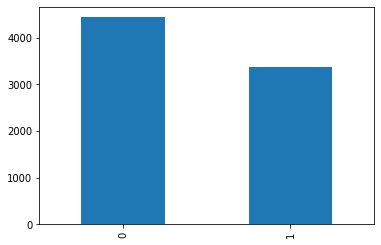

In [8]:
#fig, ax = plt.subplots()
#df['valence'].value_counts().plot(ax=ax, kind='bar')

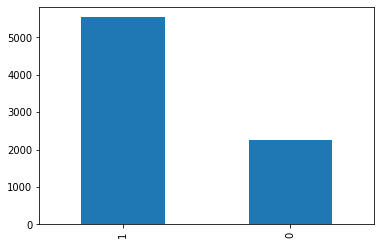

In [9]:
#fig, ax = plt.subplots()
#df['activation'].value_counts().plot(ax=ax, kind='bar')

In [481]:
df['activation'].value_counts()

1    5537
0    2263
Name: activation, dtype: int64

In [ ]:
for i in df['features']:
    print(np.array(i).shape)


In [33]:
shapeList=np.array([])
shapeList=[np.append(shapeList,np.array(i).shape[0]) for i in df['features']]

In [228]:
PAD_ROWS=1800 #int(np.max(shapeList))26
PAD_COLS=26

In [485]:
z = np.zeros((PAD_ROWS,PAD_COLS),dtype=float)
df1=df.copy()
feature_set=pd.DataFrame(np.zeros((TOTAL_DATA,2),dtype=float),columns=['features','label'])
feature_set['features']=df_new['features']
code=0
for i in tqdm_notebook(range(TOTAL_DATA)):
    feat=z
    [r,c]=np.array(df_new['features'][i]).shape
    feat[:r,:c]=np.array(df['features'][i])
    feat = np.array(feat.flatten())
    feature_set['features'][i]=feat
    v=df_new['valence'][i]
    a=df_new['activation'][i]
    
    if v==0 and a==0:
        code=0
    elif v==0 and a==1:
        code=1
    elif v==1 and a==0:
        code=2
    elif v==1 and a==1:
        code=3
    feature_set['label'][i]=code
    

    

c:\python37\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


c:\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
c:\python37\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [489]:
labels = pd.get_dummies(feature_set['label']).values.tolist()
features = np.matrix(feature_set['features'])

In [498]:
features

matrix([[array([[5.50281068],
       [5.38963072],
       [5.8907994 ],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]]),
         array([[5.05907617],
       [5.28849232],
       [4.26334385],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]]),
         array([[4.21854627],
       [4.9614365 ],
       [3.66501177],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]]),
         ...,
         array([[4.14330313],
       [3.7911808 ],
       [4.70994794],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]]),
         array([[5.17258907],
       [3.71467658],
       [3.81985425],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]]),
         array([[2.99486865],
       [5.90922739],
       [6.20837786],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])]], dtype=object)

In [392]:
X_train[0].shape[0]

46800

In [440]:
X = features
Y = labels

<h6> Splitting the data into training and validation </h6>

In [535]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=96)

In [540]:
input_dim=X_train[0].shape
input_dim

(46800,)

<h6> Creating the Model </h6>

In [508]:
model = Sequential()
model.add(Flatten())
model.add(Dense(64,input_dim=46800, activation=tf.nn.relu))
model.add(Dropout(0.5))
# model.add(Dense(128,activation=tf.nn.relu))
# model.add(Dropout(0.5))
model.add(Dense(64,activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(32,activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(8,activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(4, activation=tf.nn.softmax))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])



In [509]:
model.fit(X_train, y_train, epochs=9)  # train the model


ValueError: Please provide as model inputs either a single array or a list of arrays. You passed: x=306     [4.440447536516562, 4.887618789418533, 5.03816...
5166    [2.557380285676953, 2.160887451048402, 4.10185...
3589    [2.933941397145098, 1.7853635854029155, 3.2139...
6555    [6.592398176760853, 5.644798929174889, 6.49677...
2387    [2.6133106069390917, 4.077123623874697, 4.8255...
                              ...                        
5748    [4.615882709973883, 4.043473199408972, 5.11945...
2412    [4.110109620420215, 5.559981478352866, 5.74124...
1446    [5.226397783954655, 5.084390248676105, 5.28065...
5082    [3.869902052679704, 5.588469938022313, 6.00048...
6228    [5.160253476496552, 4.6647521194721335, 3.5184...
Name: features, Length: 7020, dtype: object

In [445]:
type(np.array(X_train))

numpy.ndarray

In [541]:
X_train = np.array(X_train.T)

In [566]:
b=pd.DataFrame(feature_set['features'])
b = b.apply(pd.Series)

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

In [569]:
c=pd.DataFrame(b.features.values.tolist())

(46800,)